In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")


In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('../datasets/vgsales.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(16598, 11)

In [4]:
# типы колонок
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 16598


In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((16598, 11), (16598, 9))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)


((16598, 11), (16291, 11))

In [10]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:

# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Year. Тип данных float64. Количество пустых значений 271, 1.63%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0
...,...
16593,2002.0
16594,2003.0
16595,2008.0
16596,2010.0


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


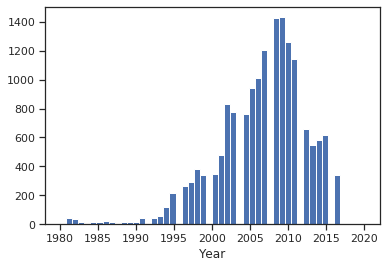

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()



In [15]:

# Фильтр по пустым значениям поля LotFrontage
data[data['Year'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [18]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Year'].isnull()].index
flt_index

Int64Index([  179,   377,   431,   470,   607,   624,   649,   652,   711,
              782,
            ...
            16191, 16194, 16198, 16229, 16246, 16307, 16327, 16366, 16427,
            16493],
           dtype='int64', length=271)

In [20]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [21]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Year']

179     NaN
377     NaN
431     NaN
470     NaN
607     NaN
         ..
16307   NaN
16327   NaN
16366   NaN
16427   NaN
16493   NaN
Name: Year, Length: 271, dtype: float64

In [22]:
data_num_MasVnrArea = data_num[['Year']]
data_num_MasVnrArea.head()

,Year
0,2006.0
1,1985.0
2,2008.0
3,2009.0
4,1996.0


In [23]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [24]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [25]:
strategies=['mean', 'median','most_frequent']
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]
strategies[0], test_num_impute(strategies[0])

('mean', array([2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 2006.40644331, 2006.40644331,
        2006.40644331, 2006.40644331, 20

In [26]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007.,
        2007., 2007., 2007., 2007., 2007., 2007., 2007., 2007., 20

In [27]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009., 2009.,
        2009., 2009., 2009., 2009., 2009., 2009., 2009., 20

In [28]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

data[['Year']].describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [29]:
test_num_impute_col(data, 'Year', strategies[0])

('Year', 'mean', 271, 2006.4064433147546, 2006.4064433147546)

In [31]:
test_num_impute_col(data, 'Year', strategies[1])

('Year', 'median', 271, 2007.0, 2007.0)

In [32]:
test_num_impute_col(data, 'Year', strategies[2])

('Year', 'most_frequent', 271, 2009.0, 2009.0)

In [33]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Publisher. Тип данных object. Количество пустых значений 58, 0.35%.


In [34]:
cat_temp_data = data[['Publisher']]
cat_temp_data.head()

,Publisher
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo


In [35]:
cat_temp_data['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [36]:
cat_temp_data[cat_temp_data['Publisher'].isnull()].shape

(58, 1)

In [37]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Nintendo'],
       ['Nintendo'],
       ['Nintendo'],
       ...,
       ['Activision'],
       ['7G//AMES'],
       ['Wanadoo']], dtype=object)

In [38]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports', '989 Studios', 'AQ Interactive', 'ASC Games',
       'ASCII Entertainment', 'ASCII Media Works', 'ASK', 'Abylight',
       'Acclaim Entertainment', 'Accolade', 'Ackkstudios', 'Acquire',
       'Activision', 'Activision Blizzard', 'Activision Value',
       'Adeline Software', 'Aerosoft', 'Agatsuma Entertainment', 'Agetec',
       'Aksys Games', 'Alawar Entertainment', 'Alchemist',
       'Alternative Software', 'Altron', 'Alvion', 'American Softworks',
       'Angel Studios', 'Answer Software', 'Aqua Plus', 'Aques',
       'Arc System Works', 'Arena Entertainment', 'Aria', 'Arika',
       'ArtDink', 'Aruze Corp', 'Ascaron Entertainment',
       'Ascaron Entertainment GmbH', 'Asgard', 'Asmik Ace Entertainment',
       'Asmik Corp', 'Aspyr', 'Astragon', 'Asylum Entertainment', 'Atari',
       'Athena', 'Atlus', 'Avalon Interactive

In [39]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Nintendo'],
       ['Nintendo'],
       ['Nintendo'],
       ...,
       ['Activision'],
       ['7G//AMES'],
       ['Wanadoo']], dtype=object)

In [40]:
np.unique(data_imp3)

array(['!!!', '10TACLE Studios', '1C Company',
       '20th Century Fox Video Games', '2D Boy', '3DO', '49Games',
       '505 Games', '5pb', '7G//AMES', '989 Sports', '989 Studios',
       'AQ Interactive', 'ASC Games', 'ASCII Entertainment',
       'ASCII Media Works', 'ASK', 'Abylight', 'Acclaim Entertainment',
       'Accolade', 'Ackkstudios', 'Acquire', 'Activision',
       'Activision Blizzard', 'Activision Value', 'Adeline Software',
       'Aerosoft', 'Agatsuma Entertainment', 'Agetec', 'Aksys Games',
       'Alawar Entertainment', 'Alchemist', 'Alternative Software',
       'Altron', 'Alvion', 'American Softworks', 'Angel Studios',
       'Answer Software', 'Aqua Plus', 'Aques', 'Arc System Works',
       'Arena Entertainment', 'Aria', 'Arika', 'ArtDink', 'Aruze Corp',
       'Ascaron Entertainment', 'Ascaron Entertainment GmbH', 'Asgard',
       'Asmik Ace Entertainment', 'Asmik Corp', 'Aspyr', 'Astragon',
       'Asylum Entertainment', 'Atari', 'Athena', 'Atlus',
       'Aval

In [42]:
data_imp3[data_imp3=='!!!'].size

58

In [43]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo
...,...
16593,Kemco
16594,Infogrames
16595,Activision
16596,7G//AMES


In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [45]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
le.inverse_transform([0, 1, 2, 3])

array(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy'], dtype=object)

In [47]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(16598, 1)

In [48]:
cat_enc_ohe.shape

(16598, 578)

In [49]:
cat_enc_ohe

<16598x578 sparse matrix of type '<class 'numpy.float64'>'
	with 16598 stored elements in Compressed Sparse Row format>

In [50]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
cat_enc.head(10)

,c1
0,Nintendo
1,Nintendo
2,Nintendo
3,Nintendo
4,Nintendo
5,Nintendo
6,Nintendo
7,Nintendo
8,Nintendo
9,Nintendo


In [52]:
pd.get_dummies(cat_enc).head()


,c1_10TACLE Studios,c1_1C Company,c1_20th Century Fox Video Games,c1_2D Boy,c1_3DO,c1_49Games,c1_505 Games,c1_5pb,c1_7G//AMES,c1_989 Sports,...,c1_Zushi Games,c1_bitComposer Games,c1_dramatic create,c1_fonfun,c1_iWin,c1_id Software,c1_imageepoch Inc.,c1_inXile Entertainment,"c1_mixi, Inc",c1_responDESIGN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,Publisher_3DO,Publisher_49Games,Publisher_505 Games,Publisher_5pb,Publisher_7G//AMES,Publisher_989 Sports,...,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN,Publisher_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


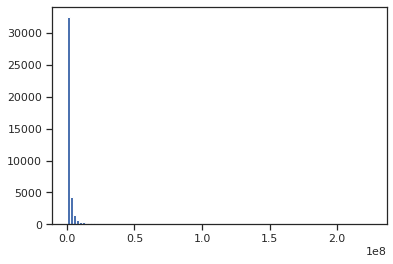

In [79]:
data = pd.read_csv('../datasets/USvideos.csv', sep=",")
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['views']])
plt.hist(data['views'], 100)
plt.show()

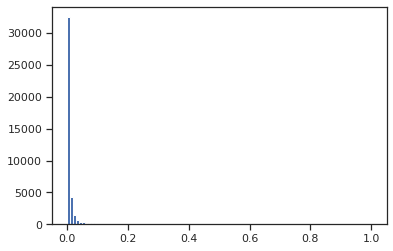

In [80]:
plt.hist(sc1_data, 100)
plt.show()

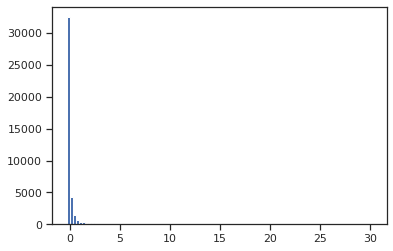

In [82]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['views']])
plt.hist(sc2_data, 100)
plt.show()

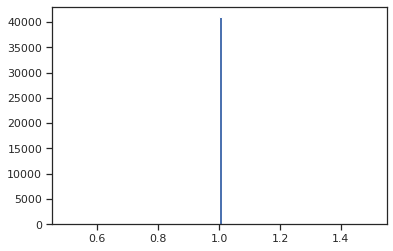

In [84]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['views']])
plt.hist(sc3_data, 100)
plt.show()
